In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("reviews_shuffled.txt", sep='\t', header=None)
train_df1 = pd.read_csv("export_dataframe.csv", sep='\t', header=None)

In [3]:
label=[x[-1:] for x in train_df[0]]
data = [x for x in train_df1[0]]

In [4]:
print(label[0:10])
print(data[0:10])

['1', '1', '1', '0', '1', '0', '1', '0', '1', '0']
['том нөлөө бүхий жижиг кино', 'сэдвийг гүн гүнзгий, резонанс бүхий дүр төрхтэй болгох боломжийг санал болгохын тулд зориудаар, чадварлаг ашиглаж байна.', 'кинон дээр гарсан хөдөлгөөнт яруу найраг нь хөгжилтэй, мэдээлэл сайтай баримтат киноны хувьд бага зэрэг давтагдах боломжтой', 'үндсэндээ оддын хоорондох хагас импровизация болон хагас уялдаатай рапсын статик цуврал юм', 'энэ жилийн хамгийн ухаантай, хуурамч хошин шогуудын нэг болно', 'багц дээр хэн ч хошигнол мэдрэмжгүй, эсвэл тэд ярих мэдрэл байхгүй байсан', 'Алдарт эцэг эхчүүдэд дуурайж буй залуу эрчүүдэд ба эрсдэл нь камерын өмнө шинэ дүр төрх, мэдрэмжийг авчирдаг', 'гудамжны найдвартай байдлыг шаардахын тулд хэтэрхий гулсаж, үйлдвэрлэсэн', 'дамжуулж болохуйц зугаа цэнгэл гэхдээ энэ нь гарсны дараа маш олон тооны дүр төрх үүсгэсэн бөгөөд дараа нь дурсагдахгүй болно.', 'энэрэл нигүүлслийн захиас нь тун тодорхой бөгөөд тусгайлан компьютерийн хөдөлгөөнт хуучны гэрээслүүлсэн үлгэрийн

In [5]:
from string import punctuation
# all_text = '\n'.join([c for c in data if c not in punctuation])
reviews_split = [c for c in data if c not in punctuation]
print(len(reviews_split))
print(len(label))

10662
10662


In [6]:
from collections import Counter

all_text2 = ' '.join(reviews_split)
# Count all the words using Counter Method
words = all_text2.split()
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)
print(sorted_words)

[('нь', 7321), ('кино', 1922), ('энэ', 1825), ('ч', 1547), ('юм', 1465), ('бол', 1381), ('бөгөөд', 1305), ('боловч', 911), ('байдаг', 813), ('киноны', 800), ('илүү', 787), ('хамгийн', 786), ('зүйл', 767), ('сайн', 763), ('юм.', 763), ('их', 750), ('түүний', 750), ('нэг', 747), ('байгаа', 747), ('сэтгэл', 742), ('шиг', 742), ('маш', 668), ('байна', 607), ('биш', 607), ('дээр', 600), ('байсан', 593), ('байх', 589), ('гэж', 580), ('Энэ', 519), ('л', 497), ('болно', 485), ('бүх', 466), ('гайхалтай', 462), ('ба', 461), ('болох', 432), ('та', 416), ('ямар', 383), ('олон', 374), ('тухай', 372), ('буй', 368), ('бага', 358), ('болон', 349), ('гэсэн', 340), ('хошин', 339), ('үнэхээр', 330), ('сайхан', 330), ('эсвэл', 323), ('тул', 319), ('гэхдээ', 318), ('муу', 317), ('дүр', 315), ('талаар', 313), ('хэзээ', 302), ('хувьд', 301), ('үүнийг', 297), ('инээдмийн', 296), ('үзэх', 285), ('тэр', 284), ('тулд', 283), ('байна.', 279), ('зураг', 279), ('өөр', 277), ('мэт', 277), ('цаг', 277), ('киног', 272

In [7]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}
print(vocab_to_int)

{'нь': 1, 'кино': 2, 'энэ': 3, 'ч': 4, 'юм': 5, 'бол': 6, 'бөгөөд': 7, 'боловч': 8, 'байдаг': 9, 'киноны': 10, 'илүү': 11, 'хамгийн': 12, 'зүйл': 13, 'сайн': 14, 'юм.': 15, 'их': 16, 'түүний': 17, 'нэг': 18, 'байгаа': 19, 'сэтгэл': 20, 'шиг': 21, 'маш': 22, 'байна': 23, 'биш': 24, 'дээр': 25, 'байсан': 26, 'байх': 27, 'гэж': 28, 'Энэ': 29, 'л': 30, 'болно': 31, 'бүх': 32, 'гайхалтай': 33, 'ба': 34, 'болох': 35, 'та': 36, 'ямар': 37, 'олон': 38, 'тухай': 39, 'буй': 40, 'бага': 41, 'болон': 42, 'гэсэн': 43, 'хошин': 44, 'үнэхээр': 45, 'сайхан': 46, 'эсвэл': 47, 'тул': 48, 'гэхдээ': 49, 'муу': 50, 'дүр': 51, 'талаар': 52, 'хэзээ': 53, 'хувьд': 54, 'үүнийг': 55, 'инээдмийн': 56, 'үзэх': 57, 'тэр': 58, 'тулд': 59, 'байна.': 60, 'зураг': 61, 'өөр': 62, 'мэт': 63, 'цаг': 64, 'киног': 65, 'уран': 66, 'болно.': 67, 'том': 68, 'би': 69, 'кинонд': 70, 'найруулагч': 71, 'байдаг.': 72, 'үл': 73, 'зүйлийг': 74, 'хийсэн': 75, 'тийм': 76, 'шинэ': 77, 'байж': 78, 'байдлаар': 79, 'хэт': 80, 'хүн': 81, '

In [8]:
print(len(reviews_split))
print(type(reviews_split[0]))

10662
<class 'str'>


In [9]:
reviews_int = []
for review in reviews_split:
    r = [vocab_to_int[w] for w in review.split()]
    reviews_int.append(r)
print(reviews_split[0])
print(reviews_int[0])

том нөлөө бүхий жижиг кино
[68, 820, 120, 325, 2]


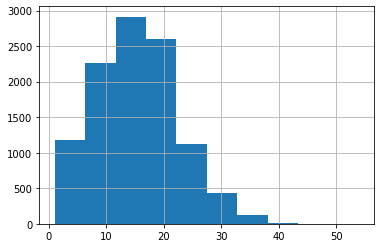

count    10662.000000
mean        15.208873
std          7.085061
min          1.000000
25%         10.000000
50%         15.000000
75%         20.000000
max         54.000000
dtype: float64

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
reviews_len = [len(x) for x in reviews_int]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [11]:
#Removing Outliers — Getting rid of extremely long or short reviews
reviews_int = [ reviews_int[i] for i, l in enumerate(reviews_len) if l>0 ]
encoded_labels = np.array([ label[i] for i, l in enumerate(reviews_len) if l> 0 ], dtype='i')

In [12]:
print(len(encoded_labels))
print(len(reviews_int))

10662
10662


In [13]:
#Padding / Truncating the remaining data

seq_length=20
''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
'''
features = np.zeros((len(reviews_int), seq_length), dtype = int)

for i, review in enumerate(reviews_int):
    review_len = len(review)

    if review_len <= seq_length:
        zeroes = list(np.zeros(seq_length-review_len))
        new = zeroes+review
    elif review_len > seq_length:
        new = review[0:seq_length]

    features[i,:] = np.array(new)



In [14]:
len(remaining_x)

NameError: name 'remaining_x' is not defined

In [15]:
#Training, Validation, Test Dataset Split
split_frac = 0.8
len_feat = len(features)

train_x = features[0:int(split_frac*len_feat)]
train_y = encoded_labels[0:int(split_frac*len_feat)]

remaining_x = features[int(split_frac*len_feat):]
remaining_y = encoded_labels[int(split_frac*len_feat):]

valid_x = remaining_x[0:int(len(remaining_x)*0.5)]
valid_y = remaining_y[0:int(len(remaining_y)*0.5)]

test_x = remaining_x[int(len(remaining_x)*0.5):]
test_y = remaining_y[int(len(remaining_y)*0.5):]

In [16]:
#Dataloaders and Batching

import torch
from torch.utils.data import DataLoader, TensorDataset
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))
# dataloaders
batch_size = 3
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size, drop_last=True)

In [17]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([3, 20])
Sample input: 
 tensor([[    0,     0,     0,     0,     0,     0,     0,     0,     0,    55,
           519,  5708,     1,  1259,   594,  5709,   179,   174,  7678,     9],
        [    0,     0,     0,     0,   231,   134,   200,   548,   232,  5105,
            39,   529,    82,     6,   566,    77,  1177,   355,    35,    31],
        [    0,     0,   294,   100,  2693,  4144,    10,  1526,   132,     1,
          5416,    11,    14,   823, 18921,  1871,   508,    26,  6573,  1635]])

Sample label size:  torch.Size([3])
Sample label: 
 tensor([0, 1, 1], dtype=torch.int32)


In [18]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)
        
        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [19]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)


SentimentLSTM(
  (embedding): Embedding(24186, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [23]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


# training params

epochs = 2 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
train_on_gpu = torch.cuda.is_available()

loss_history = []
net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        inputs = inputs.type(torch.LongTensor)
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        loss_history.append(loss.item())
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                inputs = inputs.type(torch.LongTensor)
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))
            

Epoch: 1/2... Step: 100... Loss: 0.147144... Val Loss: 0.769043
Epoch: 1/2... Step: 200... Loss: 0.068193... Val Loss: 1.017603
Epoch: 1/2... Step: 300... Loss: 0.392964... Val Loss: 0.898438
Epoch: 1/2... Step: 400... Loss: 0.117951... Val Loss: 0.767192
Epoch: 1/2... Step: 500... Loss: 0.101433... Val Loss: 0.973441
Epoch: 1/2... Step: 600... Loss: 0.035114... Val Loss: 0.891038
Epoch: 1/2... Step: 700... Loss: 0.013169... Val Loss: 0.831969
Epoch: 1/2... Step: 800... Loss: 0.125039... Val Loss: 0.786955
Epoch: 1/2... Step: 900... Loss: 0.054603... Val Loss: 0.894884
Epoch: 1/2... Step: 1000... Loss: 0.045254... Val Loss: 0.903731
Epoch: 1/2... Step: 1100... Loss: 0.042513... Val Loss: 0.869089
Epoch: 1/2... Step: 1200... Loss: 0.407152... Val Loss: 0.903004
Epoch: 1/2... Step: 1300... Loss: 0.135333... Val Loss: 0.972622
Epoch: 1/2... Step: 1400... Loss: 0.024247... Val Loss: 0.870916
Epoch: 1/2... Step: 1500... Loss: 2.116898... Val Loss: 0.887360
Epoch: 1/2... Step: 1600... Loss: 

In [24]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    
    # get predicted outputs
    inputs = inputs.type(torch.LongTensor)
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 1.357
Test accuracy: 0.687


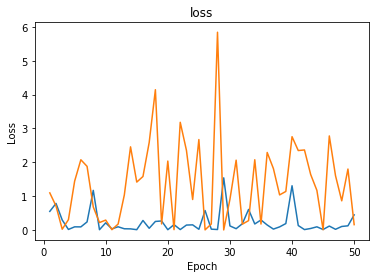

In [39]:
import matplotlib.pyplot as plt

# plotting the trianing loss
plt.plot(range(1,  50+ 1), loss_history[1000:1050])
plt.plot(range(1, 50 + 1), val_losses[100:150])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('loss')
plt.show()